In [67]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [68]:
n=500
p=10
avg = np.array([0])
sd = np.identity(p)
X = np.random.normal(loc=0,scale=1,size=(n,p))
Y = np.ones((n,1))
for i in range(Y.shape[0]):
  if (np.linalg.norm(X[i,:])**2 >= 9.34):
    Y[i] = 1
  else:
    Y[i] = -1

In [69]:
def boosting(X, Y, N):
  n = X.shape[0]
  Y_predicted = np.ones((N,n))
  alpha_arr = []
  err_arr=[]
  model_arr = []
  W = np.ones(n)/n
  alpha=0
  CT = None
  for i in range(N):
    CT = DecisionTreeClassifier(max_leaf_nodes = 2)
    CT = CT.fit(X, Y, sample_weight = W)
    Y_p = CT.predict(X)
    model_arr.append(CT)
    marr=np.zeros(n)
    for i in range(n):
      if Y_p[i]!=Y[i]:
        marr[i] = 1
    rate_err = np.sum(W*marr)/np.sum(W)
    err_arr.append(rate_err)
    alpha = math.log((1-rate_err)/rate_err)
    alpha_arr.append(alpha)
    W = W*(np.exp(alpha*marr))

  return alpha_arr, err_arr, model_arr


In [90]:
count = 100
alphas, error_rates, models = boosting(X,Y,count)
Y_prediction = np.zeros((count,X.shape[0]))
for i in range(count):
  Y_p = models[i].predict(X)*alphas[i]
  Y_prediction[i,:] = Y_p

Y_pf = np.sum(Y_prediction,axis=0)
Y_pf = np.sign(Y_pf)

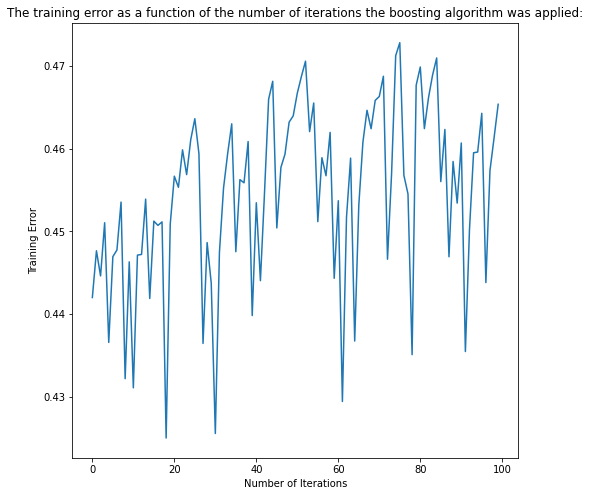

In [91]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(count),error_rates)
plt.xlabel("Number of Iterations")
plt.ylabel("Training Error")
plt.title("The training error as a function of the number of iterations the boosting algorithm was applied:")
plt.show()